In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# from remove_correlated_descriptors import MultiCollinearityEliminator

In [44]:
df = pd.read_csv('data_GWP_atoms.csv')
df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,GWP
0,0,-0.6854,0.469773,16.0871,11.416344,0,0,12,4,8,...,6.871320,1.717830,2.310660,2.310660,0.00000,10,1,0.282,10,4.440
1,0,0.9449,0.892836,10.8232,7.301172,0,0,8,4,4,...,6.732051,1.683013,4.488034,0.000000,0.00000,9,0,1.542,12,6.400
2,0,-0.9734,0.947508,18.9987,14.509930,0,0,15,5,10,...,8.849874,1.769975,2.362437,2.362437,0.00000,20,2,0.851,14,2.900
3,0,-0.6961,0.484555,20.6715,14.509930,0,0,15,5,10,...,8.696802,1.739360,2.313053,2.313053,0.00000,18,2,0.742,16,4.290
4,0,0.1242,0.015426,21.5446,14.509930,0,0,15,5,10,...,8.696802,1.739360,2.329115,2.329115,0.00000,18,2,0.579,16,2.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0,0.0211,0.000445,17.4128,10.884758,0,0,11,5,6,...,8.696802,1.739360,4.899812,4.899812,0.00000,18,2,0.241,16,2.870
183,0,-1.1870,1.408969,16.2111,10.089551,0,0,11,4,7,...,6.871320,1.717830,4.621320,2.310660,2.31066,10,1,-1.275,10,9.530
184,0,-0.5281,0.278890,23.7679,14.943137,0,0,15,6,9,...,11.812500,1.968750,5.875000,2.937500,2.93750,27,3,-0.576,24,15.500
185,0,5.1662,26.689622,49.8066,47.827032,0,0,37,13,24,...,23.625608,1.817354,15.358678,5.652951,0.00000,248,12,4.392,64,0.828


## Data Preprocessing
Reduce the numebr of desciptors by removing:
* Descriptors with zero variance
* Any one of two descriptors with a correlation coefficient > 0.95

In [45]:
def remove_collinear_features(x, threshold):

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [46]:
# drop descriptors with only one value
df = df.loc[:,df.nunique()!=1]
# when two descriptors have a correlation over 0.95 remove one of them
df = remove_collinear_features(df, 0.95)

In [47]:
# at this point, I think the first two steps of the paper have been recreated. However,
# the paper had 531 features left here instead of 668
df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAtom,nHeavyAtom,nH,nB,...,JGT,VE1_D,VE2_D,VE3_D,VR1_D,VR2_D,SRW5,WTPT-3,XLogP,GWP
0,0,-0.6854,0.469773,16.0871,11.416344,0,12,4,8,0,...,0.277778,0.000000e+00,0.000000e+00,0.000000,8.452347e+00,2.113087,0.0,2.310660,0.282,4.440
1,0,0.9449,0.892836,10.8232,7.301172,0,8,4,4,0,...,0.500000,1.110000e-16,2.780000e-17,-14.694720,3.000000e+06,750000.000000,0.0,4.488034,1.542,6.400
2,0,-0.9734,0.947508,18.9987,14.509930,0,15,5,10,0,...,0.261574,2.220000e-16,4.440000e-17,-18.021827,2.000004e+06,400000.845900,0.0,2.362437,0.851,2.900
3,0,-0.6961,0.484555,20.6715,14.509930,0,15,5,10,0,...,0.486111,6.081016e-02,1.216203e-02,-1.399999,1.237595e+01,2.475191,0.0,2.313053,0.742,4.290
4,0,0.1242,0.015426,21.5446,14.509930,0,15,5,10,0,...,0.486111,6.081016e-02,1.216203e-02,-1.399999,1.237595e+01,2.475191,0.0,2.329115,0.579,2.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0,0.0211,0.000445,17.4128,10.884758,0,11,5,6,0,...,0.486111,6.081016e-02,1.216203e-02,-1.399999,1.237595e+01,2.475191,0.0,4.899812,0.241,2.870
183,0,-1.1870,1.408969,16.2111,10.089551,0,11,4,7,0,...,0.277778,0.000000e+00,0.000000e+00,0.000000,8.452347e+00,2.113087,0.0,4.621320,-1.275,9.530
184,0,-0.5281,0.278890,23.7679,14.943137,0,15,6,9,0,...,0.000000,7.220000e-16,1.200000e-16,-20.918999,2.242419e+01,3.737365,0.0,5.875000,-0.576,15.500
185,0,5.1662,26.689622,49.8066,47.827032,0,37,13,24,0,...,0.995270,5.550000e-17,4.270000e-18,-48.658932,4.000027e+06,307694.365500,0.0,15.358678,4.392,0.828


## Normalize the Data


In [48]:
from scipy.stats import zscore

# a function to normalize all the data in a data frame execpt the target variable
def my_normalizer(df, target, noralize_target = False):
    column_names = df.columns
    normalized_data = pd.DataFrame(zscore(df), columns=column_names)
    if not noralize_target:
        normalized_data[target] = df[target]

    return normalized_data

df = my_normalizer(df, 'GWP')
df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAtom,nHeavyAtom,nH,nB,...,JGT,VE1_D,VE2_D,VE3_D,VR1_D,VR2_D,SRW5,WTPT-3,XLogP,GWP
0,-0.28046,-0.705055,-0.212377,-0.253202,-0.524342,-0.609286,-0.292024,-0.789803,0.180840,-0.103975,...,-0.702354,-0.625459,-0.578342,0.765718,-0.630200,-0.611651,-0.256579,-0.672318,-0.548392,4.440
1,-0.28046,0.537507,-0.143745,-0.702741,-1.037607,-0.609286,-0.869893,-0.789803,-0.703267,-0.103975,...,0.424499,-0.625459,-0.578342,-0.164891,1.525491,2.162446,-0.256579,-0.232254,0.133326,6.400
2,-0.28046,-0.924560,-0.134876,-0.004550,-0.138494,-0.609286,0.141377,-0.511661,0.622894,-0.103975,...,-0.784520,-0.625459,-0.578342,-0.375595,0.806928,0.867867,-0.256579,-0.661854,-0.240537,2.900
3,-0.28046,-0.713210,-0.209979,0.138308,-0.138494,-0.609286,0.141377,-0.511661,0.622894,-0.103975,...,0.354071,1.220320,1.726728,0.677057,-0.630197,-0.611649,-0.256579,-0.671834,-0.299511,4.290
4,-0.28046,-0.088004,-0.286085,0.212871,-0.138494,-0.609286,0.141377,-0.511661,0.622894,-0.103975,...,0.354071,1.220320,1.726728,0.677057,-0.630197,-0.611649,-0.256579,-0.668588,-0.387702,2.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,-0.28046,-0.166584,-0.288515,-0.139987,-0.590644,-0.609286,-0.436491,-0.511661,-0.261214,-0.103975,...,0.354071,1.220320,1.726728,0.677057,-0.630197,-0.611649,-0.256579,-0.149031,-0.570575,2.870
183,-0.28046,-1.087359,-0.060014,-0.242612,-0.689826,-0.609286,-0.436491,-0.789803,-0.040187,-0.103975,...,-0.702354,-0.625459,-0.578342,0.765718,-0.630200,-0.611651,-0.256579,-0.205316,-1.390802,9.530
184,-0.28046,-0.585166,-0.243344,0.402741,-0.084462,-0.609286,0.141377,-0.233520,0.401867,-0.103975,...,-2.110920,-0.625459,-0.578342,-0.559072,-0.630190,-0.611645,-0.256579,0.048062,-1.012610,15.500
185,-0.28046,3.754845,4.041201,2.626455,4.016982,-0.609286,3.319652,1.713470,3.717271,-0.103975,...,2.935936,-0.625459,-0.578342,-2.315828,2.244076,0.526443,-0.256579,1.964786,1.675308,0.828


In [49]:
df['ALogP'].max()

6.474031016563227

In [50]:
df.to_csv('preprocessed_normalized_GWP.csv', index=False)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop(['GWP'], axis = 1)
y = df['GWP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)


Mean Squared Error: 164.6456057164881
R^2 Value: -0.10032818443908709


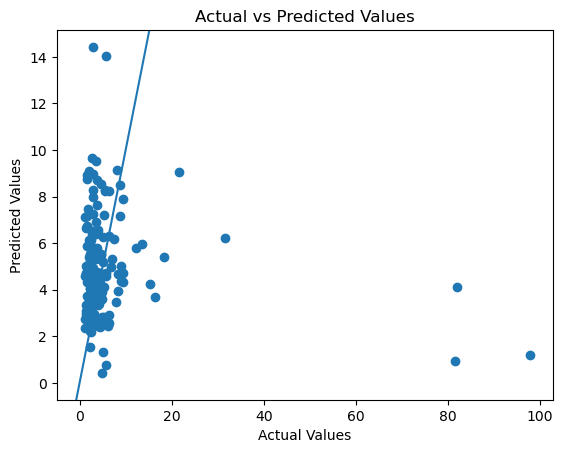

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, lin_reg_pred))
print("R^2 Value:", r2_score(y_test, lin_reg_pred))

plt.scatter(y_test, lin_reg_pred)
plt.axline((0, 0), slope=1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()